In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
dire = r"D:\Bases de Datos\América"

df = pd.read_excel(dire+"/Amazonas.xlsx")


In [3]:
df.ADM0NAME.unique()

array(['Brasil', 'Colombia', 'Ecuador', 'Guyana', 'Suriname', 'Venezuela',
       'Bolivia', 'Peru'], dtype=object)

In [4]:
gdf = gpd.read_file(dire+"/BR_municipios_2024.zip")

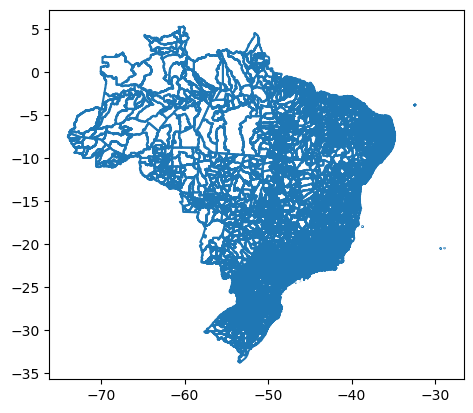

In [5]:
brasil = gdf.boundary.plot()

In [7]:
gdf.NM_UF.unique()

array(['Paraíba', 'Tocantins', 'Maranhão', 'Goiás', 'Alagoas', 'Pará',
       'Rio Grande do Sul', 'Santa Catarina', 'Minas Gerais', 'Amazonas',
       'São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Mato Grosso',
       'Ceará', 'Rio Grande do Norte', 'Sergipe', 'Bahia', 'Paraná',
       'Mato Grosso do Sul', 'Pernambuco', 'Piauí', 'Amapá', 'Rondônia',
       'Roraima', 'Acre', 'Distrito Federal'], dtype=object)

In [8]:
df[df.ADM0NAME == 'Brasil']

,nombre_completo_censo,año,ADM0NAME,ADM1NAME,ADM2NAME,poblacion,hombre,mujer,nacio_aqui,indigena,...,urb_viviendas_sin_servicio_de_basura,urb_viviendas_sin_internet,urb_personas_en_casa_o_depto,urb_personas_sin_cel,urb_personas_sin_agua_por_caneria,urb_personas_sin_alcantarillado,urb_personas_sin_bano,urb_personas_sin_electricidad,urb_personas_sin_internet,urb_personas_sin_servicio_basura
0,Alta Floresta D'Oeste_Rondônia,2010,Brasil,Rondônia,Alta Floresta D'Oeste,24390,12655,11735,8710,496,...,262,177,13730,1642,912,13610,140,10,629,816.0
1,Ariquemes_Rondônia,2010,Brasil,Rondônia,Ariquemes,90351,45542,44809,38690,96,...,647,2157,75954,5770,8365,75139,286,175,7434,2495.0
2,Cabixi_Rondônia,2010,Brasil,Rondônia,Cabixi,6312,3266,3046,2136,2,...,9,66,2682,694,39,2682,0,3,192,22.0
3,Cacoal_Rondônia,2010,Brasil,Rondônia,Cacoal,78574,39124,39450,33204,1466,...,353,1583,61542,3795,691,30547,157,229,5217,1127.0
4,Cerejeiras_Rondônia,2010,Brasil,Rondônia,Cerejeiras,17028,8551,8477,5672,13,...,361,242,14356,1419,1571,14284,48,64,839,1163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,Vianopolis_Goias,2010,Brasil,Goiás,Vianópolis,12548,6297,6251,7538,0,...,32,143,9123,544,25,8950,11,5,482,62.0
5561,Vicentinopolis_Goias,2010,Brasil,Goiás,Vicentinópolis,7369,3872,3497,2612,8,...,18,99,6246,298,655,6223,22,18,342,76.0
5562,Vila Boa_Goias,2010,Brasil,Goiás,Vila Boa,4735,2588,2147,1847,0,...,13,45,3475,289,72,3455,10,10,152,27.0
5563,Vila Propicio_Goias,2010,Brasil,Goiás,Vila Propício,5144,2689,2455,2907,3,...,1,24,1485,207,56,1471,6,3,96,0.0


ValueError: aspect must be finite and positive 

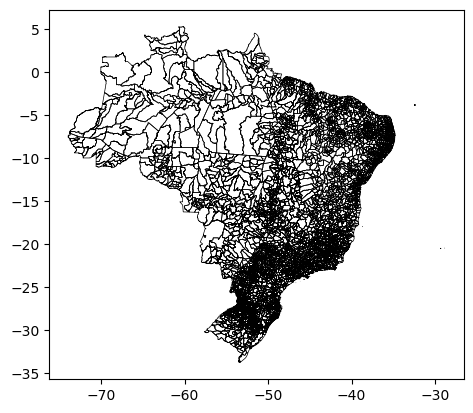

In [9]:
brasil = gdf.boundary.plot(linewidth=0.5, color='black')
gdf[gdf.NM_MUN == 'Vila Boa_Goias'].plot(ax = brasil, color= 'red')


In [41]:
gdf[gdf.NM_MUN == 'Vila Boa_Goias']#.plot(ax = brasil, color= 'red')

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry


In [42]:
gdf[gdf.NM_MUN.apply(lambda x: x.find('Vila Boa') != -1)]

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
2236,5222203,Vila Boa,520022,Flores de Goiás,5206,Luziânia - Águas Lindas de Goiás,52,Goiás,GO,5,Centro-oeste,CO,None,None,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06..."


In [43]:
len(gdf.NM_MUN.unique())

5300

<Axes: >

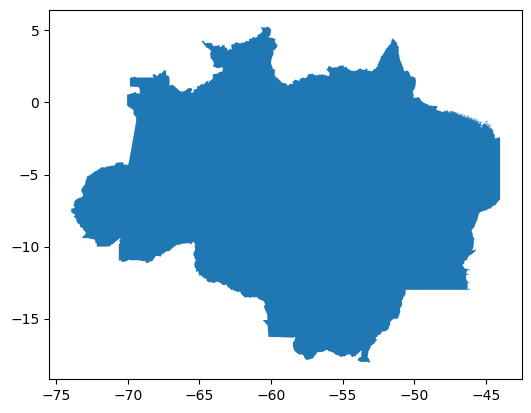

In [10]:
amazonas = gpd.read_file(dire+"/GEOFT_AMAZONIA_LEGAL/GEOFT_AMAZONIA_LEGAL.shp")
amazonas.plot()

<Axes: >

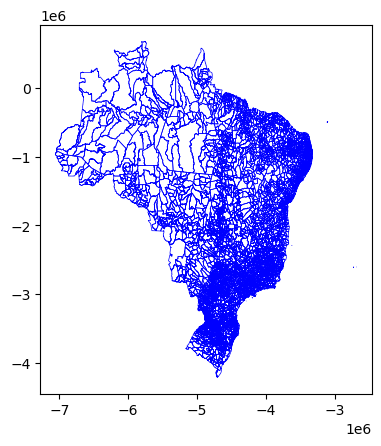

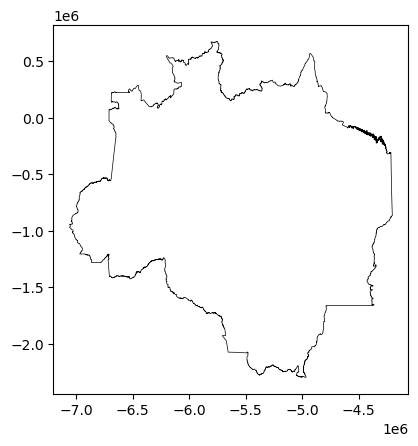

In [11]:
gdf = gdf.to_crs(epsg=8857)
amazonas = amazonas.to_crs(epsg=8857)
gdf.boundary.plot(linewidth=0.5, color='blue')
amazonas.boundary.plot(linewidth=0.5, color='black')


In [14]:
unidades_en_amazonas = gpd.sjoin(gdf,amazonas, predicate='within')
unidades_en_amazonas

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,index_right,AML_CD,AML_GM_ARE,AML_GM_PER,AML _GM_PO
1,1718451,Pugmil,170003,Paraíso do Tocantins,1701,Palmas,17,Tocantins,TO,1,...,N,None,None,401.174,"POLYGON ((-4648176.571 -1350205.013, -4648191....",0,1.0,0.0,0.0,None
5,1703883,Carmolândia,170005,Araguaína,1702,Araguaína,17,Tocantins,TO,1,...,N,None,None,339.366,"POLYGON ((-4611076.332 -912598.984, -4611075.6...",0,1.0,0.0,0.0,None
6,1501782,Breu Branco,150011,Tucuruí,1503,Marabá,15,Pará,PA,1,...,N,None,None,3941.736,"POLYGON ((-4743014.075 -523139.772, -4743036.1...",0,1.0,0.0,0.0,None
11,1720804,Sítio Novo do Tocantins,170009,Araguatins,1702,Araguaína,17,Tocantins,TO,1,...,N,None,None,307.095,"POLYGON ((-4557229.733 -718432.033, -4562712.5...",0,1.0,0.0,0.0,None
16,1301159,Careiro da Várzea,130001,Manaus,1301,Manaus,13,Amazonas,AM,1,...,N,None,None,2627.474,"POLYGON ((-5670327.546 -416136.386, -5670153.0...",0,1.0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,1301902,Itacoatiara,130011,Itacoatiara,1304,Parintins,13,Amazonas,AM,1,...,N,None,None,8891.979,"POLYGON ((-5639132.363 -455674.551, -5639132.3...",0,1.0,0.0,0.0,None
5567,2111532,São Pedro da Água Branca,210019,Imperatriz,2105,Imperatriz,21,Maranhão,MA,2,...,NE,None,None,720.461,"POLYGON ((-4608624.322 -640464.278, -4608784.5...",0,1.0,0.0,0.0,None
5569,1505635,Piçarra,150009,Marabá,1503,Marabá,15,Pará,PA,1,...,N,None,None,3312.703,"POLYGON ((-4655712.472 -862117.861, -4655794.3...",0,1.0,0.0,0.0,None
5571,1713205,Miracema do Tocantins,170004,Miracema do Tocantins,1701,Palmas,17,Tocantins,TO,1,...,N,None,None,2663.745,"POLYGON ((-4642010.126 -1287764.708, -4642011....",0,1.0,0.0,0.0,None


<Axes: >

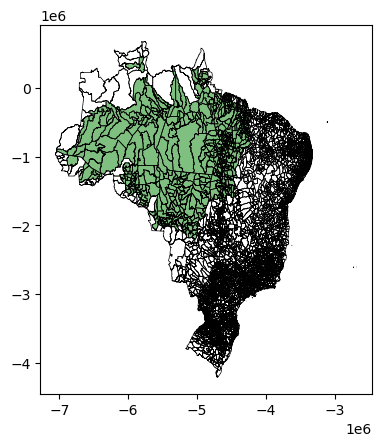

In [15]:
brasil = gdf.boundary.plot(linewidth=0.5, color='black')
unidades_en_amazonas.plot(color='green', alpha=0.5, ax =brasil)

<Axes: >

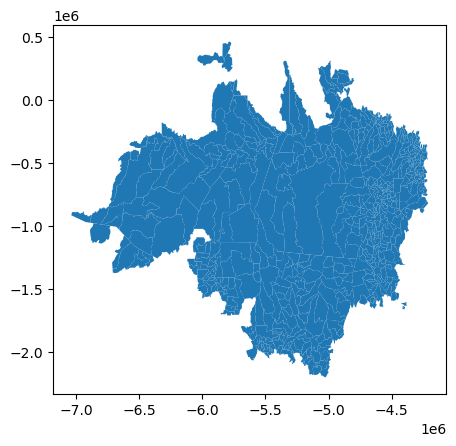

In [17]:
unidades_en_amazonas.plot()

d:\Anaconda3\envs\geo\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'Limites2024.zip': 'LimRAISG' (default), 'LimBiogeografico'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

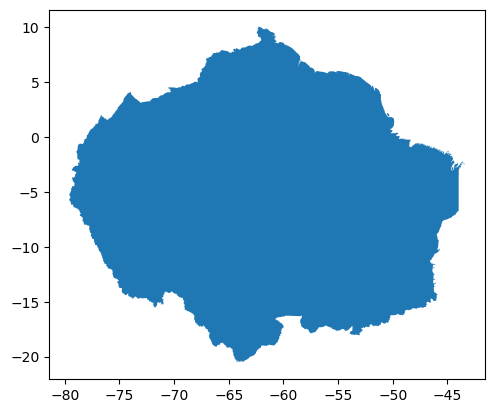

In [22]:
gdf2 = gpd.read_file(r"D:\Bases de Datos\América/Limites2024.zip")
gdf2.plot()

In [84]:
import sys 
sys.path.append(r"D:\Archivos\Codigos\funciones")
import comparar_frases as cf

[0.125, 0.5142857142857142, 1, 0.8]


In [98]:
df.nombre_completo_censo
v = np.array(cf.buscar_frase(df.nombre_completo_censo[0], gdf.NM_MUN)).max()

gdf[np.array(cf.buscar_frase(df.nombre_completo_censo[0], gdf.NM_MUN)) >= v]


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
3390,5100250,Alta Floresta,510010,Alta Floresta,5103,Sinop,51,Mato Grosso,MT,5,Centro-oeste,CO,None,None,8955.41,"POLYGON ((-5320148.781 -1209178.912, -5317752...."


In [100]:
import uuid

comparaciones = []

for idx, nombre_censo in enumerate(df.nombre_completo_censo):
    similitudes = np.array(cf.buscar_frase(nombre_censo, gdf.NM_MUN))
    max_sim = similitudes.max()
    indices_max = np.where(similitudes == max_sim)[0]
    for i in indices_max:
        comparaciones.append({
            'codigo': str(uuid.uuid4()),
            'nombre_censo': nombre_censo,
            'nombre_gdf': gdf.NM_MUN.iloc[i],
            'similitud': max_sim
        })

tabla_comparativa = pd.DataFrame(comparaciones)
tabla_comparativa.head()

,codigo,nombre_censo,nombre_gdf,similitud
0,c5635bce-f261-472f-af72-28fc5cf4403b,Alta Floresta D'Oeste_Rondônia,Alta Floresta,0.733333
1,0117acf6-3607-472b-bdc8-9feeaabe4a9b,Ariquemes_Rondônia,Queimados,0.426923
2,0ea10d68-89c3-4c9b-99d7-c7b9e6bb215e,Cabixi_Rondônia,Indiaroba,0.404545
3,b0b2cb94-4af0-4555-a27e-861f9dca79d5,Cacoal_Rondônia,Londrina,0.430000
4,d4bdd224-1ec9-4709-b714-5c49b3ab7046,Cacoal_Rondônia,Carolina,0.430000


In [103]:
tabla_comparativa[tabla_comparativa.nombre_censo == "Ariquemes_Rondônia"]

,codigo,nombre_censo,nombre_gdf,similitud
1,0117acf6-3607-472b-bdc8-9feeaabe4a9b,Ariquemes_Rondônia,Queimados,0.426923


In [104]:
tabla_comparativa[tabla_comparativa.nombre_gdf == "Londrina"]

,codigo,nombre_censo,nombre_gdf,similitud
3,b0b2cb94-4af0-4555-a27e-861f9dca79d5,Cacoal_Rondônia,Londrina,0.430000
5853,e2a78702-363c-402d-b891-c412f79aaa5e,Florida_Parana,Londrina,0.430000
5986,9e591915-15b5-4cf9-9305-698df86b6cac,Loanda_Parana,Londrina,0.416667
5993,00a31d2e-b920-47cd-a2db-60eb2cfd180c,Londrina_Parana,Londrina,0.461111
9108,edc6423a-6681-43bb-a14f-8fa17c2f0f03,NARIÑO-ALDANA,Londrina,0.461111


In [99]:
df.nombre_completo_censo[0]

"Alta Floresta D'Oeste_Rondônia"

In [94]:
df

,nombre_completo_censo,año,ADM0NAME,ADM1NAME,ADM2NAME,poblacion,hombre,mujer,nacio_aqui,indigena,...,urb_viviendas_sin_servicio_de_basura,urb_viviendas_sin_internet,urb_personas_en_casa_o_depto,urb_personas_sin_cel,urb_personas_sin_agua_por_caneria,urb_personas_sin_alcantarillado,urb_personas_sin_bano,urb_personas_sin_electricidad,urb_personas_sin_internet,urb_personas_sin_servicio_basura
0,Alta Floresta D'Oeste_Rondônia,2010,Brasil,Rondônia,Alta Floresta D'Oeste,24390,12655,11735,8710,496,...,262,177,13730,1642,912,13610,140,10,629,816.0
1,Ariquemes_Rondônia,2010,Brasil,Rondônia,Ariquemes,90351,45542,44809,38690,96,...,647,2157,75954,5770,8365,75139,286,175,7434,2495.0
2,Cabixi_Rondônia,2010,Brasil,Rondônia,Cabixi,6312,3266,3046,2136,2,...,9,66,2682,694,39,2682,0,3,192,22.0
3,Cacoal_Rondônia,2010,Brasil,Rondônia,Cacoal,78574,39124,39450,33204,1466,...,353,1583,61542,3795,691,30547,157,229,5217,1127.0
4,Cerejeiras_Rondônia,2010,Brasil,Rondônia,Cerejeiras,17028,8551,8477,5672,13,...,361,242,14356,1419,1571,14284,48,64,839,1163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,Yauyos_Lima,2017,Peru,Lima,Yauyos,20463,11088,9375,16472,3769,...,4325,11082,2603,1951,5224,0,400,11101,0,NaN
7570,Yungay_Ancash,2017,Peru,Ancash,Yungay,50841,24815,26026,45171,23926,...,4003,15108,1840,2044,3934,0,1963,13237,0,NaN
7571,Yunguyo_Puno,2017,Peru,Puno,Yunguyo,36939,18038,18901,34380,28700,...,5055,14445,3384,3708,6617,0,2281,13421,0,NaN
7572,Zarumilla_Tumbes,2017,Peru,Tumbes,Zarumilla,48844,24608,24236,30068,1034,...,10972,44873,6037,17368,20267,0,4789,37002,0,NaN


In [62]:
ecuador = gpd.read_file(dire+"/ecuador/nxcantones.shp")
ecuador

,DPA_CANTON,DPA_DESCAN,DPA_VALOR,DPA_ANIO,DPA_PROVIN,DPA_DESPRO,SUPERFICIE,geometry
0,0101,CUENCA,0.0,2001,01,AZUAY,3103.720097,"POLYGON ((682457.567 9716225.005, 682784.904 9..."
1,0102,GIRON,0.0,2001,01,AZUAY,353.747452,"POLYGON ((696928.44 9661026.375, 696958.861 96..."
2,0103,GUALACEO,0.0,2001,01,AZUAY,347.527165,"POLYGON ((756004.753 9689467.548, 756135.819 9..."
3,0104,NABON,0.0,2001,01,AZUAY,633.289726,"POLYGON ((721857.5 9644366.086, 721872.272 964..."
4,0105,PAUTE,0.0,2001,01,AZUAY,270.784224,"POLYGON ((764977.657 9707086.416, 764977.657 9..."
...,...,...,...,...,...,...,...,...
215,2204,LORETO,0.0,2001,22,ORELLANA,2151.258696,"POLYGON ((912582.649 9960882.38, 912610.167 99..."
216,9001,LAS GOLONDRINAS,0.0,2001,90,ZONAS NO DELIMITADAS,137.329872,"POLYGON ((734473.997 10040675.656, 734493.439 ..."
217,9002,LA CONCORDIA,0.0,2001,90,ZONAS NO DELIMITADAS,645.776326,"POLYGON ((660487.028 10013217.372, 660476.771 ..."
218,9003,MANGA DEL CURA,0.0,2001,90,ZONAS NO DELIMITADAS,488.038660,"POLYGON ((671511.452 9945202.108, 671468.853 9..."


In [80]:
ecuador = ecuador.to_crs(epsg=8857)

gpd.sjoin(ecuador, amazonas, predicate='within')

,DPA_CANTON,DPA_DESCAN,DPA_VALOR,DPA_ANIO,DPA_PROVIN,DPA_DESPRO,SUPERFICIE,geometry,index_right,AML_CD,AML_GM_ARE,AML_GM_PER,AML _GM_PO


In [63]:
df[df.ADM0NAME == 'Ecuador']

,nombre_completo_censo,año,ADM0NAME,ADM1NAME,ADM2NAME,poblacion,hombre,mujer,nacio_aqui,indigena,...,urb_viviendas_sin_servicio_de_basura,urb_viviendas_sin_internet,urb_personas_en_casa_o_depto,urb_personas_sin_cel,urb_personas_sin_agua_por_caneria,urb_personas_sin_alcantarillado,urb_personas_sin_bano,urb_personas_sin_electricidad,urb_personas_sin_internet,urb_personas_sin_servicio_basura
6687,CUENCA_AZUAY,2010,Ecuador,AZUAY,CUENCA,505585,239497,266088,376904,9157,...,1035,69447,297674,44987,29091,19783,1119,775,247887,3867.0
6688,GIRON_AZUAY,2010,Ecuador,AZUAY,GIRON,12607,5777,6830,10354,72,...,46,1095,3857,1358,226,290,59,11,3805,145.0
6689,GUALACEO_AZUAY,2010,Ecuador,AZUAY,GUALACEO,42709,19481,23228,35192,2289,...,212,3403,13151,3668,1764,2165,143,101,12751,809.0
6690,NABON_AZUAY,2010,Ecuador,AZUAY,NABON,15892,7340,8552,14273,5034,...,17,328,1193,304,233,161,19,10,1147,47.0
6691,PAUTE_AZUAY,2010,Ecuador,AZUAY,PAUTE,25494,11881,13613,20392,175,...,95,1892,6674,1702,1083,795,14,32,6743,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,LIBERTAD_SANTA ELENA,2010,Ecuador,SANTA ELENA,LIBERTAD,95942,48030,47912,61333,1189,...,885,21930,74545,19549,36765,61710,6224,4493,86405,2756.0
6907,SALINAS_SANTA ELENA,2010,Ecuador,SANTA ELENA,SALINAS,68675,35436,33239,39817,119,...,138,7082,30809,6226,7441,8644,570,677,28772,498.0
6908,LAS GOLONDRINAS_ZONAS NO DELIMITADAS,2010,Ecuador,ZONAS NO DELIMITADAS,LAS GOLONDRINAS,5302,2768,2534,1440,8,...,0,0,0,0,0,0,0,0,0,0.0
6909,MANGA DEL CURA_ZONAS NO DELIMITADAS,2010,Ecuador,ZONAS NO DELIMITADAS,MANGA DEL CURA,20758,11083,9675,6660,14,...,0,0,0,0,0,0,0,0,0,0.0


In [68]:
peru = gpd.read_file(dire+"/DISTRITOS_peru.zip")
peru

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
0,100902,1.0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,CODO DEL POZUZO,7768.0,5022.0,4329.0,2.338322,...,96.0,53.846154,112.0,208.0,37.0,11868.28878,9469.69031,75000.0,730.0,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0,"POLYGON ((-75.20831 -9.10175, -75.20805 -9.101..."
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,40.0,50.617284,41.0,81.0,53.0,3892.91357,3316.87044,43950.0,540.0,"POLYGON ((-74.95635 -8.79148, -74.95612 -8.792..."
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,156.0,52.000000,169.0,325.0,176.0,11690.84202,11225.28471,125760.0,1366.0,"POLYGON ((-75.10843 -8.7999, -75.11753 -8.8120..."
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,0.0,0.000000,0.0,0.0,60.0,7432.20148,6834.75852,237441.0,691.0,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,100609,1870.0,HUANUCO,LEONCIO PRADO,PUEBLO NUEVO,PUEBLO NUEVO,4474.0,3126.0,2622.0,13.827847,...,0.0,0.000000,0.0,0.0,0.0,5250.23771,4666.05437,0.0,600.0,"POLYGON ((-76.21547 -9.13933, -76.21398 -9.138..."
1870,100610,1871.0,HUANUCO,LEONCIO PRADO,SANTO DOMINGO DE ANDA,PACAE,2752.0,1910.0,1618.0,9.705862,...,0.0,0.000000,0.0,0.0,21.0,2340.90471,2179.45723,45200.0,215.0,"POLYGON ((-76.09634 -9.02897, -76.09605 -9.028..."
1871,211105,1872.0,PUNO,SAN ROMAN,SAN MIGUEL,SAN MIGUEL,65422.0,47896.0,42210.0,537.126437,...,99.0,52.403846,109.0,208.0,0.0,19568.60311,15881.26813,0.0,2266.0,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."
1872,150806,1873.0,LIMA,HUAURA,HUAURA,HUAURA,37162.0,27907.0,23704.0,76.712838,...,276.0,54.530478,331.0,607.0,214.0,14412.21097,13111.55076,282300.0,1334.0,"POLYGON ((-77.32632 -10.90656, -77.32664 -10.9..."


In [71]:
df[df.ADM0NAME == 'Peru']

,nombre_completo_censo,año,ADM0NAME,ADM1NAME,ADM2NAME,poblacion,hombre,mujer,nacio_aqui,indigena,...,urb_viviendas_sin_servicio_de_basura,urb_viviendas_sin_internet,urb_personas_en_casa_o_depto,urb_personas_sin_cel,urb_personas_sin_agua_por_caneria,urb_personas_sin_alcantarillado,urb_personas_sin_bano,urb_personas_sin_electricidad,urb_personas_sin_internet,urb_personas_sin_servicio_basura
7376,nombre_completo_2,2017,Peru,completo_2,nombre,poblacion,hombre,mujer,nacio_aqui,indigena,...,urb_viviendas_sin_internet,urb_personas_en_casa_o_depto,urb_personas_sin_cel,urb_personas_sin_agua_por_caneri,urb_personas_sin_alcantarillado,urb_personas_sin_bano,urb_personas_sin_electricidad,urb_personas_sin_internet,urb_personas_sin_servicio_basura,NaN
7377,Abancay_Apurimac,2017,Peru,Apurimac,Abancay,110520,54091,56429,72055,69484,...,18830,79668,5347,17842,22377,0,2800,59398,0,NaN
7378,Acobamba_Huancavelica,2017,Peru,Huancavelica,Acobamba,38208,18246,19962,34358,27124,...,4932,16081,2679,3809,8292,0,2157,15252,0,NaN
7379,Acomayo_Cusco,2017,Peru,Cusco,Acomayo,22940,11215,11725,20541,16117,...,4673,14546,3699,2853,4713,0,1948,14402,0,NaN
7380,Aija_Ancash,2017,Peru,Ancash,Aija,6316,3242,3074,5461,2013,...,706,2068,300,100,330,0,233,1852,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,Yauyos_Lima,2017,Peru,Lima,Yauyos,20463,11088,9375,16472,3769,...,4325,11082,2603,1951,5224,0,400,11101,0,NaN
7570,Yungay_Ancash,2017,Peru,Ancash,Yungay,50841,24815,26026,45171,23926,...,4003,15108,1840,2044,3934,0,1963,13237,0,NaN
7571,Yunguyo_Puno,2017,Peru,Puno,Yunguyo,36939,18038,18901,34380,28700,...,5055,14445,3384,3708,6617,0,2281,13421,0,NaN
7572,Zarumilla_Tumbes,2017,Peru,Tumbes,Zarumilla,48844,24608,24236,30068,1034,...,10972,44873,6037,17368,20267,0,4789,37002,0,NaN


<Axes: >

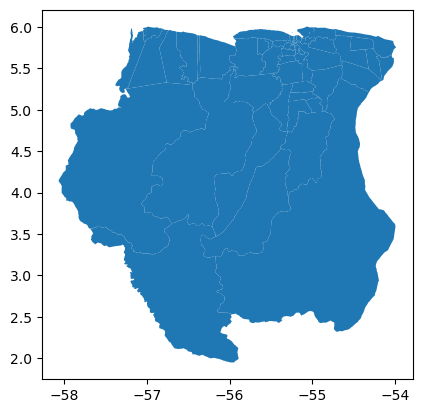

In [79]:
gpd.read_file(dire+"/geoBoundaries-SUR-ADM2.geojson").plot()